In [8]:
import pandas as pd
import numpy as np
import torch
from torch import Tensor
import seaborn as sns
from matplotlib import pyplot as plt
from utils import distribution_functions
from utils import NNarySearch

### Torch logistic function

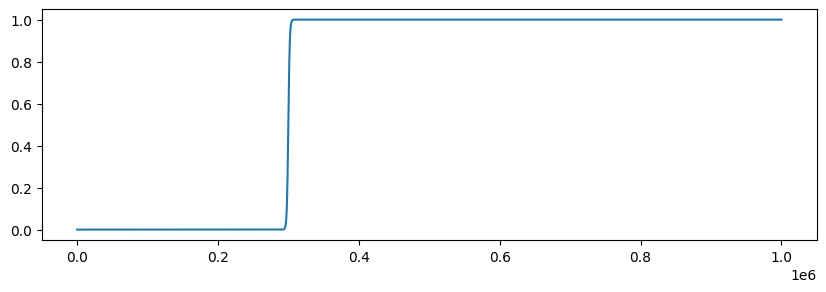

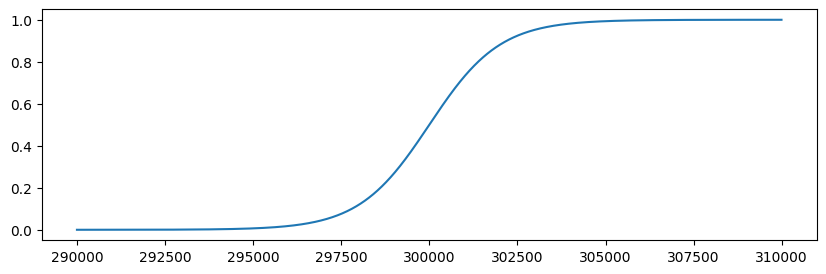

In [9]:
linspace, logistic = distribution_functions.logistic_tensor(3e5, 1e-3, 0, 1e6)


plt.figure(figsize=(10, 3))
sns.lineplot(x=linspace.numpy(), y=logistic.numpy());
plt.figure(figsize=(10, 3))

mask = (linspace > 2.9e5) & (linspace < 3.1e5)
sns.lineplot(x=linspace[mask].numpy(), y=logistic[mask].numpy());

# Binary search simulation

<Axes: >

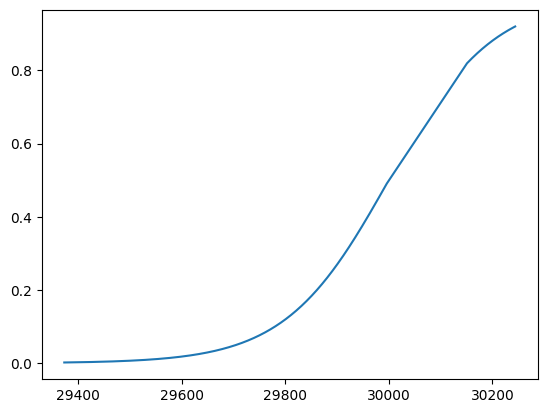

In [10]:
binary = NNarySearch.NNarySearch(n=5, bounds=(0.1, 0.9), split_power=0.2)

res = binary.run_search(logistic)
sns.lineplot(res)


In [11]:
results = []
def run_simulations(center_space, power_space, split_space):
    for log_center in center_space:
        linspace, logistic = distribution_functions.logistic_tensor(float(log_center), 1e-3, 0, 1e6)
        for splits in split_space:
            for power in power_space:
                power = round(power, 1)
                search = NNarySearch.NNarySearch(splits, split_power=power)
                try:
                    search.run_search(logistic)

                    results.append({
                        "log_center": log_center,
                        "splits": splits,
                        "power": power,
                        "value": search.iterations,
                    })
                    #print('a', end= '-')
                except:
                    None
                    #print()
                    #print(f"Failed for log_center={log_center}, splits={splits}, power={power}")
            

    grid = pd.DataFrame(results)
    #grid = grid / (len(center_space) * len(power_space) * len(split_space))
    pivot = grid.pivot_table(index="splits", columns="power", values="value", aggfunc="sum")
    return pivot

c:\GITHUB\BO-Coli\utils\NNarySearch.py:39: RuntimeWarning: invalid value encountered in scalar remainder
  remainder = len(data)% sum(reg_sizes)
c:\GITHUB\BO-Coli\utils\NNarySearch.py:45: RuntimeWarning: invalid value encountered in cast
  for size in reg_sizes.astype(int):


<Axes: xlabel='power', ylabel='splits'>

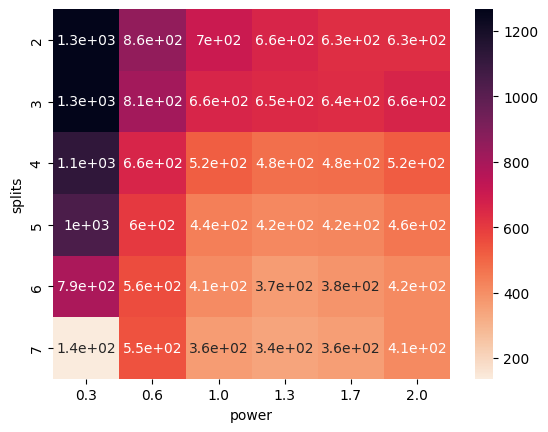

In [12]:
center_space = np.linspace(1e2, 2e5, 100)
power_space = np.linspace(0.3, 2, 6)
split_space = np.arange(2, 8)

pivot = run_simulations(center_space, power_space, split_space)


sns.heatmap(
    pivot, 
    annot=True, 
   # fmt="d",  # integer format for annotations
    cmap=sns.color_palette("rocket_r", as_cmap=True)
)

<Axes: xlabel='power', ylabel='splits'>

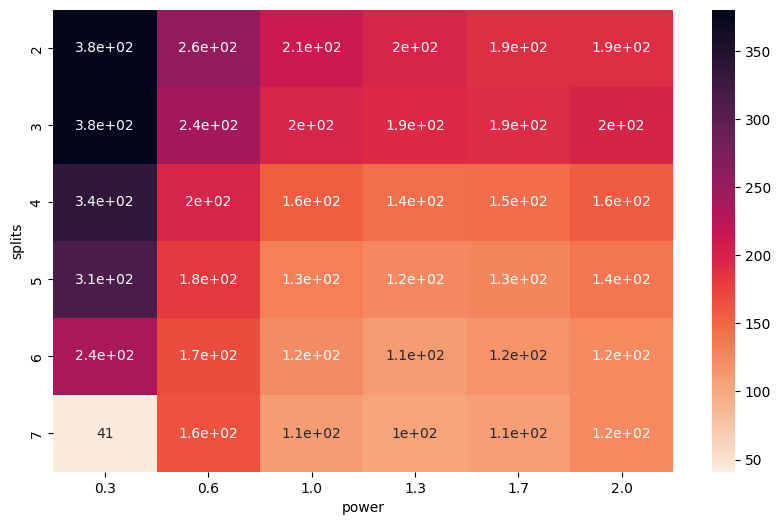

In [13]:
pivot = pivot /100*6*5
plt.figure(figsize=(10, 6))

sns.heatmap(
    pivot, 
    annot=True, 
   # fmt="d",  # integer format for annotations
    cmap=sns.color_palette("rocket_r", as_cmap=True)
)

In [14]:
binary.display_history()

Iteration: 0


,0,1,2
0,initial,0,99999


Iteration: 1


,0,1,2,3,4
region,inflection,stable_high,stable_high,stable_high,stable_high
start,0,79999,95998,99198,99838
end,79998,95997,99197,99837,99997
min,0.0,1.0,1.0,1.0,1.0
max,1.0,1.0,1.0,1.0,1.0


Iteration: 2


,0,1,2,3,4
region,inflection,stable_high,stable_high,stable_high,stable_high
start,0,63749,76498,79048,79558
end,63748,76497,79047,79557,79996
min,0.0,1.0,1.0,1.0,1.0
max,1.0,1.0,1.0,1.0,1.0


Iteration: 3


,0,1,2,3,4
region,inflection,stable_high,stable_high,stable_high,stable_high
start,0,50624,60748,62773,63178
end,50623,60747,62772,63177,63746
min,0.0,1.0,1.0,1.0,1.0
max,1.0,1.0,1.0,1.0,1.0


Iteration: 4


,0,1,2,3,4
region,inflection,stable_high,stable_high,stable_high,stable_high
start,0,39999,47998,49598,49918
end,39998,47997,49597,49917,50621
min,0.0,1.0,1.0,1.0,1.0
max,1.0,1.0,1.0,1.0,1.0


Iteration: 5


,0,1,2,3,4
region,inflection,stable_high,stable_high,stable_high,stable_high
start,0,31874,38248,39523,39778
end,31873,38247,39522,39777,39996
min,0.0,1.0,1.0,1.0,1.0
max,1.0,1.0,1.0,1.0,1.0


Iteration: 6


,0,1,2,3,4
region,stable_low,boundary,boundary,stable_high,stable_high
start,0,24999,29998,30998,31198
end,24998,29997,30997,31197,31871
min,0.0,0.0,0.49575,0.999954,0.999994
max,0.0,0.49325,0.999953,0.999994,1.0


Iteration: 7


,0,1,2,3,4
region,stable_low,inflection,stable_high,stable_high,stable_high
start,24999,29373,30247,30422,30457
end,29372,30246,30421,30456,30995
min,0.0,0.001894,0.922229,0.985557,0.989779
max,0.001875,0.921509,0.985415,0.989678,0.999952


Iteration: 8


,0,1,2,3,4
region,boundary,target_match,target_match,target_match,boundary
start,29373,29997,30121,30146,30151
end,29996,30120,30145,30150,30244
min,0.001894,0.49325,0.770835,0.811996,0.81951
max,0.490751,0.769064,0.810465,0.818026,0.92005
